In [22]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import Bounds
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

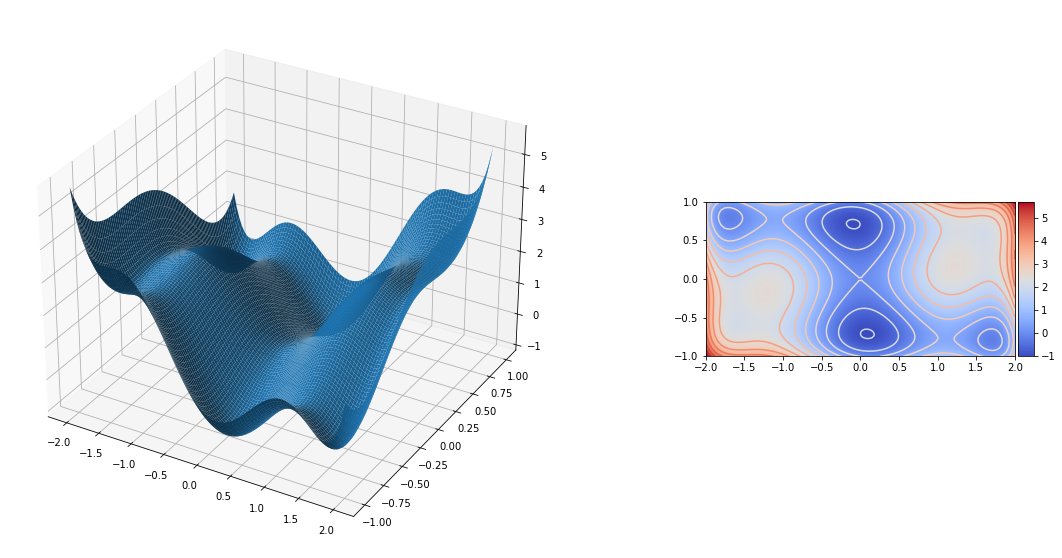

In [58]:
# function
def f(parameters):
    x, y = parameters
    return (4 - 2.1*x**2 + x**4/3.) * x**2 + x * y + (4*y**2 - 4) * y**2

# domain
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-1, 1, 100)
x, y = np.meshgrid(xs, ys)

# plot layout
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=2, projection='3d')
ax2 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)

# 3d plot
ax1.plot_surface(x, y, f((x,y)), cstride=1, rstride=1)

# heat map and contour plot
im = ax2.imshow(f((x,y)), cmap='coolwarm', origin='lower', extent=[-2, 2, -1, 1])
ax2.contour(x, y, f((x,y)), cmap='coolwarm', levels=np.arange(-6, 6, 0.5))

# add colorbar
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax2, orientation='vertical')

# show
plt.show()

In [59]:
'''
    Once the minimum points have been identified
    thanks to the previous plots, I define bounds to
    search for the points using scipy.optimize.minimize().
'''

# specify bounds: splits [-1,1] in half and [-2,2] in three parts
bounds = [Bounds([-2, -1], [-1, 0]), Bounds([-1, -1], [1, 0]), Bounds([1, -1], [2, 0]), 
          Bounds([-2,  0], [-1, 1]), Bounds([-1,  0], [1, 1]), Bounds([1,  0], [2, 1])]

# initial starting point [x0, y0]
p0 = [[-1.5, -0.5], [0., -0.5], [1.5, -0.5],
      [-1.5,  0.5], [0.,  0.5], [1.5,  0.5]]

print("Minimizing the function...")

# unzip the bounds
for guess, bound in zip(p0, bounds):

    # apply algorithm 
    res = sp.optimize.minimize(f, guess, bounds=bound)
    resPar = res.x
    x_min, y_min = resPar
    print("\nx_min =", x_min,"\ty_min =", y_min,
          "\tf(x_min, y_min) =", f(resPar))

Minimizing the function...

x_min = -1.6071049259309291 	y_min = -0.5686518877757405 	f(x_min, y_min) = 2.1042503103121803

x_min = 0.08984198346231073 	y_min = -0.7126564006047424 	f(x_min, y_min) = -1.031628453489874

x_min = 1.703607010539061 	y_min = -0.796083820093631 	f(x_min, y_min) = -0.21546382438224965

x_min = -1.7036069919488375 	y_min = 0.7960838106157976 	f(x_min, y_min) = -0.2154638243823992

x_min = -0.0898419923336939 	y_min = 0.7126563923169865 	f(x_min, y_min) = -1.031628453489875

x_min = 1.6071049470809051 	y_min = 0.5686518804518959 	f(x_min, y_min) = 2.1042503103122043


In [61]:
'''
    Try to find the minimum with an initial
    guess of (0, 0). This is a saddle point 
    of the function. As a result, the algorithm
    'does not move' from it when trying to 
    minimize the function.
'''

print("Minimizing the function, using (0, 0) as the starting point...")
p0 = [0., 0.]
res = sp.optimize.minimize(f, p0)
resPar = res.x
x_min, y_min = resPar
print("\nx_min =", x_min,"\ty_min =", y_min, 
      "\tf(x_min, y_min) =", f(resPar))

Minimizing the function, using (0, 0) as the starting point...

x_min = 0.0 	y_min = 0.0 	f(x_min, y_min) = 0.0


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.